In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder

# Считываем данные

In [2]:
df = pd.read_csv('data.csv', sep = ';')
df

,federal_district,federal_district_short,region_code,region_name,okato,id,name,name_short,year,e1,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2013,61.88,...,8.1480,1.8060,346.5420,34979.8,1183805.084,53753,86.11,420,12016.20,3781.40
1,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2014,55.81,...,15.7210,29.7306,591.9454,34739.6,1258764.500,53753,88.74,398,11741.00,3749.05
2,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2015,57.45,...,20.4820,55.8250,1323.0140,35750.5,1192261.000,51206,88.72,385,19762.05,3459.40
3,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2016,59.44,...,4.8490,22.3054,1456.9007,32631.6,760364.600,60484,90.93,373,21984.62,3514.65
4,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2017,60.15,...,3.9930,17.0247,1014.9843,39626.1,741335.000,60471,90.36,363,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,Южный федеральный округ,ЮФО,92,г. Севастополь,67000000000,113437,Федеральное государственное автономное образов...,ФГАОУ ВО «Севастопольский государственный унив...,2015,0.00,...,19.5254,34.3580,647.0198,76607.7,1913694.300,116769,52.45,838,12394.02,6790.05
2560,Южный федеральный округ,ЮФО,92,г. Севастополь,67000000000,113437,Федеральное государственное автономное образов...,ФГАОУ ВО «Севастопольский государственный унив...,2016,59.70,...,17.8100,41.2370,1070.0385,92135.6,1612505.300,116517,57.76,685,10754.50,6939.50
2561,Южный федеральный округ,ЮФО,92,г. Севастополь,67000000000,113437,Федеральное государственное автономное образов...,ФГАОУ ВО «Севастопольский государственный унив...,2017,59.57,...,24.7660,62.7690,1337.9740,89355.8,1665959.500,117339,62.02,610,67191.50,7191.85
2562,Центральный федеральный округ,ЦФО,77,г. Москва,45000000000,120111,Федеральное государственное автономное образов...,"Московский политехнический университет, Москов...",2016,63.77,...,81.6384,176.3517,2595.5271,454723.3,3861039.200,194673,65.94,1063,101059.41,13375.10


# Формат данных

In [3]:
df.dtypes

federal_district           object
federal_district_short     object
region_code                 int64
region_name                object
okato                       int64
id                          int64
name                       object
name_short                 object
year                        int64
e1                        float64
e2                        float64
e3                        float64
e4                        float64
e5                        float64
e6                        float64
e8                        float64
ege_budg                  float64
wos                       float64
scopus                    float64
rsci                      float64
rnd                       float64
total_income              float64
square                      int64
phd_share                 float64
pps                         int64
rnd_private               float64
pk                        float64
dtype: object

# Удаление неинформативных признаков

In [ ]:
# federal_district_short - тоже самое federal_district
# name_short - тоже самое name
# region_code - зачем код если есть название
# okato - зачем если есть region_name
# id - зачем, если есть name

In [4]:
df.drop(['federal_district_short', 'okato', 'name_short'], axis = 1, inplace = True)
df

,federal_district,region_code,region_name,id,name,year,e1,e2,e3,e4,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,Южный федеральный округ,1,Республика Адыгея (Адыгея),1,Федеральное государственное бюджетное образова...,2013,61.88,75.55,6.63,2556.79,...,8.1480,1.8060,346.5420,34979.8,1183805.084,53753,86.11,420,12016.20,3781.40
1,Южный федеральный округ,1,Республика Адыгея (Адыгея),1,Федеральное государственное бюджетное образова...,2014,55.81,76.32,9.17,2765.05,...,15.7210,29.7306,591.9454,34739.6,1258764.500,53753,88.74,398,11741.00,3749.05
2,Южный федеральный округ,1,Республика Адыгея (Адыгея),1,Федеральное государственное бюджетное образова...,2015,57.45,86.40,12.43,2881.25,...,20.4820,55.8250,1323.0140,35750.5,1192261.000,51206,88.72,385,19762.05,3459.40
3,Южный федеральный округ,1,Республика Адыгея (Адыгея),1,Федеральное государственное бюджетное образова...,2016,59.44,84.80,15.85,1976.00,...,4.8490,22.3054,1456.9007,32631.6,760364.600,60484,90.93,373,21984.62,3514.65
4,Южный федеральный округ,1,Республика Адыгея (Адыгея),1,Федеральное государственное бюджетное образова...,2017,60.15,109.27,24.50,2044.22,...,3.9930,17.0247,1014.9843,39626.1,741335.000,60471,90.36,363,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,Южный федеральный округ,92,г. Севастополь,113437,Федеральное государственное автономное образов...,2015,0.00,84.99,7.54,2123.02,...,19.5254,34.3580,647.0198,76607.7,1913694.300,116769,52.45,838,12394.02,6790.05
2560,Южный федеральный округ,92,г. Севастополь,113437,Федеральное государственное автономное образов...,2016,59.70,126.14,6.20,2207.55,...,17.8100,41.2370,1070.0385,92135.6,1612505.300,116517,57.76,685,10754.50,6939.50
2561,Южный федеральный округ,92,г. Севастополь,113437,Федеральное государственное автономное образов...,2017,59.57,129.54,5.62,2415.13,...,24.7660,62.7690,1337.9740,89355.8,1665959.500,117339,62.02,610,67191.50,7191.85
2562,Центральный федеральный округ,77,г. Москва,120111,Федеральное государственное автономное образов...,2016,63.77,431.18,8.83,3661.14,...,81.6384,176.3517,2595.5271,454723.3,3861039.200,194673,65.94,1063,101059.41,13375.10


# Сколько университетов в каждом регионе

In [ ]:
count_uni = df.groupby('federal_district')['name'].nunique().reset_index(name = 'Количество университетов')
count_uni = count_uni.sort_values('Количество университетов', ascending = False).reset_index(drop = True)
count_uni

,federal_district,Количество университетов
0,Центральный федеральный округ,189
1,Приволжский федеральный округ,99
2,Сибирский федеральный округ,70
3,Северо-западный федеральный округ,63
4,Уральский федеральный округ,43
5,Южный федеральный округ,42
6,Дальневосточный федеральный округ,32
7,Северо-Кавказский федеральный округ,27


# Рейтинг

In [ ]:
count_uni['Рейтинг'] = count_uni.index + 1
count_uni

,federal_district,Количество университетов,Рейтинг
0,Центральный федеральный округ,189,1
1,Приволжский федеральный округ,99,2
2,Сибирский федеральный округ,70,3
3,Северо-западный федеральный округ,63,4
4,Уральский федеральный округ,43,5
5,Южный федеральный округ,42,6
6,Дальневосточный федеральный округ,32,7
7,Северо-Кавказский федеральный округ,27,8


# Рейтинг показателей по информативности

In [ ]:
var = df.drop(['federal_district','region_name', 'id', 'name', 'year'], axis = 1)

In [ ]:
def info_rating(df):
    coef_var = df.std() / df.mean() * 100
    return coef_var

result = pd.DataFrame()
result['coef_var'] = info_rating(var)
result = result.sort_values('coef_var', ascending = True)
result['rating'] = np.arange(1, result.shape[0]+1)
result

,coef_var,rating
e1,18.504538,1
ege_budg,24.107649,2
phd_share,24.284534,3
e6,31.271734,4
e5,49.937979,5
pk,94.701938,6
e3,104.609079,7
pps,104.920626,8
square,106.387779,9
e8,131.054752,10


# Графический анализ показателей

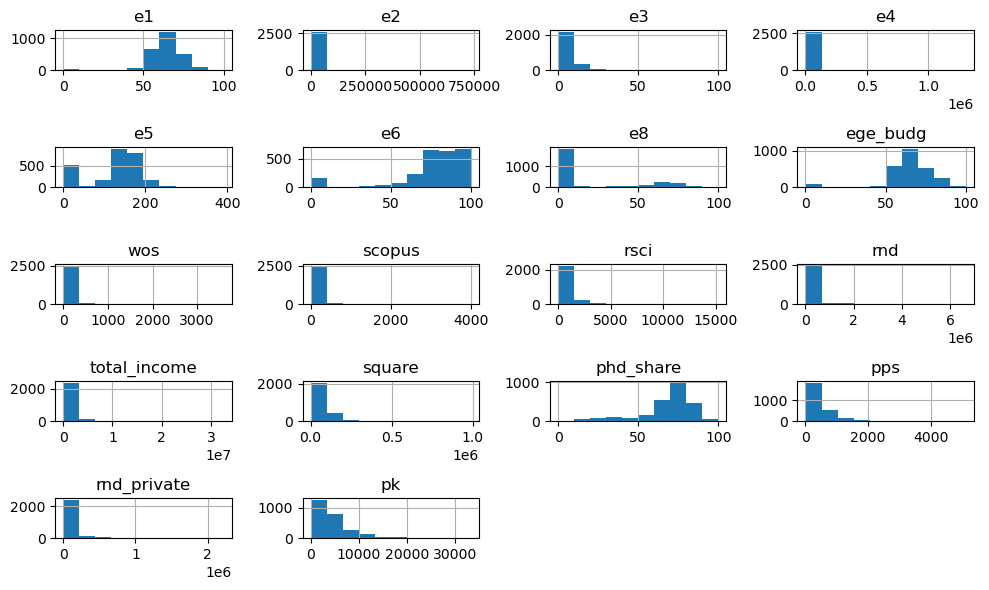

In [ ]:
var.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

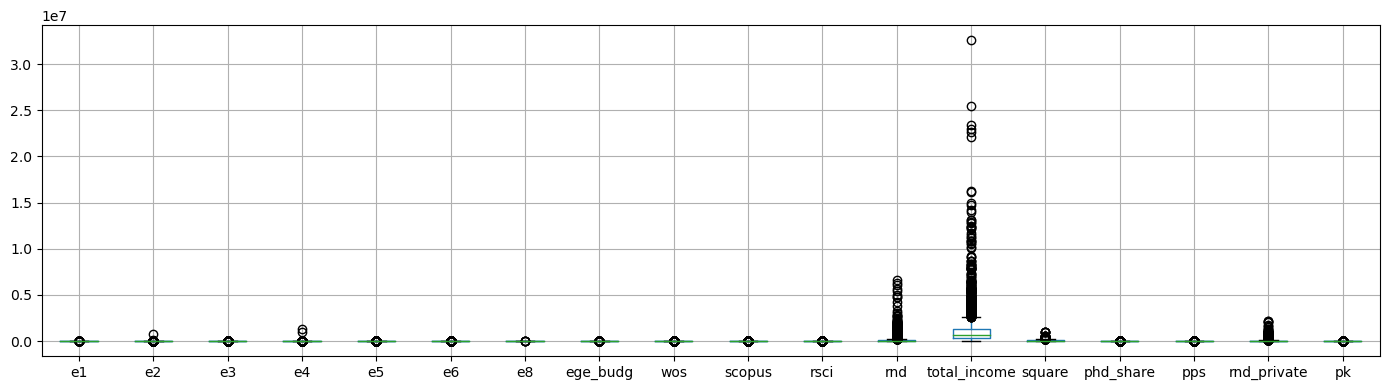

In [ ]:
var.boxplot(figsize=(14, 4))
plt.tight_layout()
plt.show()

# Удаление дубликатов

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,federal_district,region_name,name,year,e1,e2,e3,e4,e5,e6,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk


# Заполнение пропусков

In [ ]:
df.isna().sum()

federal_district     0
region_code          0
region_name          0
name                 0
year                 0
e1                   0
e2                   0
e3                   0
e4                   0
e5                   0
e6                  67
e8                   0
ege_budg             0
wos                  0
scopus               0
rsci                 0
rnd                  0
total_income         0
square               0
phd_share            0
pps                  0
rnd_private          0
pk                   0
dtype: int64

In [ ]:
std = []

In [ ]:
# пропуски только в столбце e6

Удаляем строки с пропусками

In [ ]:
df_a = df.dropna()
std_a = df_a['e6'].std()
std.append(std_a)
std_a

23.472296578661766

Заполняем пропуски константой (0)

In [ ]:
df_b = df.fillna(0)
std_b = df_b['e6'].std()
std.append(std_b)
std_b

26.07631544886683

Заполняем пропуски средним арифметическим

In [ ]:
df_c_1 = df.fillna(df['e6'].mean())
std_c_1 = df_c_1['e6'].std()
std.append(std_c_1)
std_c_1

23.16346744128789

Заполняем пропуски медианой

In [ ]:
df_c_2 = df.fillna(df['e6'].median())
std_c_2 = df_c_2['e6'].std()
std.append(std_c_2)
std_c_2

23.176878761294812

Заполняем пропуски модой

In [ ]:
df_c_3 = df.fillna(df['e6'].mode()[0])
std_c_3 = df_c_3['e6'].std()
std.append(std_c_3)
std_c_3

23.163469363673652

In [ ]:
std

[23.472296578661766,
 26.07631544886683,
 23.16346744128789,
 23.176878761294812,
 23.163469363673652]

In [ ]:
nan = df[df.isnull().any(axis=1)].reset_index(drop = True)
nan

,federal_district,region_code,region_name,name,year,e1,e2,e3,e4,e5,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,Сибирский федеральный округ,38,Иркутская область,Федеральное государственное бюджетное образова...,2015,60.28,240.48,2.27,2375.57,163.38,...,127.9118,150.1912,1815.3037,193289.6,1909368.2,121846,73.28,779,93293.04,9252.90
1,Приволжский федеральный округ,12,Республика Марий Эл,Федеральное государственное бюджетное образова...,2017,62.83,103.26,19.73,1761.61,195.84,...,105.7563,90.7437,2310.5256,48738.3,831480.3,56812,82.46,393,28606.47,5268.10
2,Центральный федеральный округ,77,г. Москва,Федеральное государственное бюджетное образова...,2017,73.74,235.20,3.23,4125.15,195.25,...,21.7768,12.4532,486.9462,49285.2,864425.1,22611,51.24,326,43455.80,2014.50
3,Центральный федеральный округ,77,г. Москва,Федеральное государственное бюджетное образова...,2015,65.56,2822.47,16.71,6443.11,157.78,...,182.8533,194.3438,1046.6302,672452.3,1535071.7,55013,74.15,343,642274.36,3202.75
4,Центральный федеральный округ,77,г. Москва,Федеральное государственное бюджетное образова...,2017,67.58,158.36,7.04,3384.91,167.21,...,201.1933,238.2350,2382.0426,177799.7,3800412.2,128575,80.46,1537,12787.84,15348.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Центральный федеральный округ,77,г. Москва,Федеральное государственное унитарное предприя...,2017,0.00,735892.54,0.00,981925.00,390.65,...,165.8459,208.1541,1220.1541,4783301.5,6382512.5,84732,90.91,11,1623602.53,17.00
63,Южный федеральный округ,82,Республика Крым,Федеральное государственное автономное образов...,2014,100.00,41.00,13.67,899.72,0.00,...,59.4864,91.6353,664.6293,94860.2,2248103.8,218874,65.15,2187,7916.94,18182.40
64,Южный федеральный округ,82,Республика Крым,Федеральное государственное автономное образов...,2015,68.61,54.85,13.81,1993.80,228.51,...,43.3020,62.8910,1252.8712,120421.1,4377398.8,165481,65.81,2062,10557.44,19209.35
65,Южный федеральный округ,92,г. Севастополь,Федеральное государственное автономное образов...,2014,0.00,9.56,9.13,215.78,33.48,...,13.7368,21.9432,50.3088,9328.1,264274.5,115715,51.41,892,169.48,5991.55


e6 - показатель, обозначающий количнство трудоустроенных студентов.\
из предложенных параметров в датасете на трудоустройство в большей степени влияют год (некоторые профессии устаревают).

регион (в разных регионах разная ситуация с безработицей)\
и e1 (средний балл егэ) (те чем он выше, тем лучше вуз и тем сильнее уровень подготовки будущих кадров
с помощью корреляционной матрицы выясним, какой из этих показателей влияет на e6 сильнее

Связь между годом и e6 наиболее сильная, следовательно, в качестве внутригруппового показателя выбираем year

In [ ]:
df.groupby('year')['e6'].mean()

year
2013    97.157119
2014    74.792060
2015    74.988839
2016    54.970060
2017    71.572917
Name: e6, dtype: float64

In [ ]:
df_d1 = df.groupby("year").transform(lambda x: x.fillna(x.mean()))
std_d1 = df_d1['e6'].std()
std.append(std_d1)
std_d1

23.16519806187037

In [ ]:
df.groupby('year')['e6'].mean()

year
2013    97.157119
2014    74.792060
2015    74.988839
2016    54.970060
2017    71.572917
Name: e6, dtype: float64

In [ ]:
df_d2 = df.groupby("year").transform(lambda x: x.fillna(x.median()))
std_d2 = df_d2['e6'].std()
std.append(std_d2)
std_d2

23.16773181675717

In [ ]:
df_d3 = df.groupby("year").transform(lambda x: x.fillna(x.mode()))
std_d3 = df_d3['e6'].std()
std.append(std_d3)
std_d3

23.472296578661766

# Линейная регрессия

In [ ]:
df_regression = df[['year', 'region_code', 'e1', 'e6']]
df_regression = df_regression.dropna()
df_regression.query('e6 > 40')
df_regression

,year,region_code,e1,e6
0,2013,1,61.88,94.464
1,2014,1,55.81,55.000
2,2015,1,57.45,55.000
3,2016,1,59.44,0.000
4,2017,1,60.15,65.000
...,...,...,...,...
2557,2017,82,64.07,65.000
2560,2016,92,59.70,0.000
2561,2017,92,59.57,55.000
2562,2016,77,63.77,75.000


In [ ]:
df_regression = df_regression[df_regression.e6 > 40]
df_regression

,year,region_code,e1,e6
0,2013,1,61.88,94.464
1,2014,1,55.81,55.000
2,2015,1,57.45,55.000
4,2017,1,60.15,65.000
5,2013,22,65.58,98.596
...,...,...,...,...
2556,2016,82,67.90,60.000
2557,2017,82,64.07,65.000
2561,2017,92,59.57,55.000
2562,2016,77,63.77,75.000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df_regression[['e6']]
X = df_regression.drop(['e6'], axis = 1)
X

,year,region_code,e1
0,2013,1,61.88
1,2014,1,55.81
2,2015,1,57.45
4,2017,1,60.15
5,2013,22,65.58
...,...,...,...
2556,2016,82,67.90
2557,2017,82,64.07
2561,2017,92,59.57
2562,2016,77,63.77


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

<Axes: >

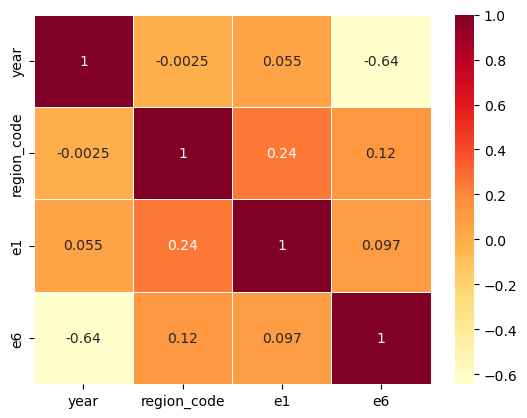

In [ ]:
sns.heatmap(df_regression.corr() , annot=True, cmap='YlOrRd', linewidths=0.5)

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
results = model.fit()
results.params

const          11767.140509
year              -5.805682
region_code        0.054711
e1                 0.131126
dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     e6   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     490.6
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          1.93e-234
Time:                        23:36:00   Log-Likelihood:                -6825.3
No. Observations:                1852   AIC:                         1.366e+04
Df Residuals:                    1848   BIC:                         1.368e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.177e+04    313.338     37.554      0.000    1.12e+04    1.24e+04
year           -5.8057      0.156    -37.325      0.000      -6.111      -5.501
region_code     0.0547      0.010      5.587      0.000       0.036       0.074
e1              0.1311      0.022      5.859      0.000       0.087       0.175
==============================================================================
Omnibus:                      187.474   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.836
Skew:                          -0.712   Prob(JB):                     1.43e-67
Kurtosis:                       4.400   Cond. No.                     2.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
nan = nan[['year', 'region_code', 'e1', 'e6']]
nan = sm.add_constant(nan)
X_val = nan.drop('e6', axis = 1)
y_val = nan[['e6']]
predictions = results.predict(X_val)
predictions

0     78.673868
1     65.974394
2     70.961181
3     81.499934
4     70.153444
        ...    
62    61.291938
63    92.095155
64    82.173423
65    79.529647
66    73.723965
Length: 67, dtype: float64

In [ ]:
pred_lin_reg = pd.DataFrame()
pred_lin_reg['e6'] = list(predictions)
pred_lin_reg

,e6
0,78.673868
1,65.974394
2,70.961181
3,81.499934
4,70.153444
...,...
62,61.291938
63,92.095155
64,82.173423
65,79.529647


In [ ]:
df_e1 = df[['e6']]
df_e1 = df_e1.merge(pred_lin_reg, how = 'outer')
df_e1 = df_e1.dropna()
std_e1 = df_e1['e6'].std()
std_e1

23.190757711396174

In [ ]:
std.append(std_e1)

# KNN

In [5]:
df = df.drop(['federal_district', 'region_name', 'name'], axis = 1)
df

,region_code,id,year,e1,e2,e3,e4,e5,e6,e8,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,1,1,2013,61.88,75.55,6.63,2556.79,14.22,94.464,6.91,...,8.1480,1.8060,346.5420,34979.8,1183805.084,53753,86.11,420,12016.20,3781.40
1,1,1,2014,55.81,76.32,9.17,2765.05,142.78,55.000,7.33,...,15.7210,29.7306,591.9454,34739.6,1258764.500,53753,88.74,398,11741.00,3749.05
2,1,1,2015,57.45,86.40,12.43,2881.25,166.81,55.000,7.10,...,20.4820,55.8250,1323.0140,35750.5,1192261.000,51206,88.72,385,19762.05,3459.40
3,1,1,2016,59.44,84.80,15.85,1976.00,146.02,0.000,6.75,...,4.8490,22.3054,1456.9007,32631.6,760364.600,60484,90.93,373,21984.62,3514.65
4,1,1,2017,60.15,109.27,24.50,2044.22,158.43,65.000,5.75,...,3.9930,17.0247,1014.9843,39626.1,741335.000,60471,90.36,363,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,92,113437,2015,0.00,84.99,7.54,2123.02,177.96,NaN,4.60,...,19.5254,34.3580,647.0198,76607.7,1913694.300,116769,52.45,838,12394.02,6790.05
2560,92,113437,2016,59.70,126.14,6.20,2207.55,154.15,0.000,3.98,...,17.8100,41.2370,1070.0385,92135.6,1612505.300,116517,57.76,685,10754.50,6939.50
2561,92,113437,2017,59.57,129.54,5.62,2415.13,162.82,55.000,4.12,...,24.7660,62.7690,1337.9740,89355.8,1665959.500,117339,62.02,610,67191.50,7191.85
2562,77,120111,2016,63.77,431.18,8.83,3661.14,161.80,75.000,2.64,...,81.6384,176.3517,2595.5271,454723.3,3861039.200,194673,65.94,1063,101059.41,13375.10


In [6]:
from sklearn.impute import KNNImputer
# Замена пропущенных значений методом k-ближайших соседей (k-NN)
def fill_missing_with_knn(df):
    imputer = KNNImputer(n_neighbors=5)
    df_filled = imputer.fit_transform(df)
    return pd.DataFrame(df_filled, columns=df.columns)

df = fill_missing_with_knn(df)
df

,region_code,id,year,e1,e2,e3,e4,e5,e6,e8,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,1.0,1.0,2013.0,61.88,75.55,6.63,2556.79,14.22,94.464,6.91,...,8.1480,1.8060,346.5420,34979.8,1183805.084,53753.0,86.11,420.0,12016.20,3781.40
1,1.0,1.0,2014.0,55.81,76.32,9.17,2765.05,142.78,55.000,7.33,...,15.7210,29.7306,591.9454,34739.6,1258764.500,53753.0,88.74,398.0,11741.00,3749.05
2,1.0,1.0,2015.0,57.45,86.40,12.43,2881.25,166.81,55.000,7.10,...,20.4820,55.8250,1323.0140,35750.5,1192261.000,51206.0,88.72,385.0,19762.05,3459.40
3,1.0,1.0,2016.0,59.44,84.80,15.85,1976.00,146.02,0.000,6.75,...,4.8490,22.3054,1456.9007,32631.6,760364.600,60484.0,90.93,373.0,21984.62,3514.65
4,1.0,1.0,2017.0,60.15,109.27,24.50,2044.22,158.43,65.000,5.75,...,3.9930,17.0247,1014.9843,39626.1,741335.000,60471.0,90.36,363.0,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,92.0,113437.0,2015.0,0.00,84.99,7.54,2123.02,177.96,58.000,4.60,...,19.5254,34.3580,647.0198,76607.7,1913694.300,116769.0,52.45,838.0,12394.02,6790.05
2560,92.0,113437.0,2016.0,59.70,126.14,6.20,2207.55,154.15,0.000,3.98,...,17.8100,41.2370,1070.0385,92135.6,1612505.300,116517.0,57.76,685.0,10754.50,6939.50
2561,92.0,113437.0,2017.0,59.57,129.54,5.62,2415.13,162.82,55.000,4.12,...,24.7660,62.7690,1337.9740,89355.8,1665959.500,117339.0,62.02,610.0,67191.50,7191.85
2562,77.0,120111.0,2016.0,63.77,431.18,8.83,3661.14,161.80,75.000,2.64,...,81.6384,176.3517,2595.5271,454723.3,3861039.200,194673.0,65.94,1063.0,101059.41,13375.10


In [ ]:
std_g = df['e6'].std()
std.append(std_g)

In [ ]:
len(std)

10

In [ ]:
names = ['удаление строк с пропусками',
         'замена пропусков константой',
        'замена ср_арифм',
        'замена медианой',
        'замена модой',
        'замена ср_арифм по году',
        'замена медианой по году',
        'замена модой по году',
        'линейная регрессия',
        'KNN']
result = pd.DataFrame({'метод' :names, 'std': std})
result

,метод,std
0,удаление строк с пропусками,23.472297
1,замена пропусков константой,26.076315
2,замена ср_арифм,23.163467
3,замена медианой,23.176879
4,замена модой,23.163469
5,замена ср_арифм по году,23.165198
6,замена медианой по году,23.167732
7,замена модой по году,23.472297
8,линейная регрессия,23.190758
9,KNN,23.228948


# Работа с выбросами

In [8]:
new_df = df.select_dtypes(exclude = 'object')
new_df = new_df.drop(['region_code', 'year', 'id'], axis = 1)
new_df

,e1,e2,e3,e4,e5,e6,e8,ege_budg,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,61.88,75.55,6.63,2556.79,14.22,94.464,6.91,63.03,8.1480,1.8060,346.5420,34979.8,1183805.084,53753.0,86.11,420.0,12016.20,3781.40
1,55.81,76.32,9.17,2765.05,142.78,55.000,7.33,57.60,15.7210,29.7306,591.9454,34739.6,1258764.500,53753.0,88.74,398.0,11741.00,3749.05
2,57.45,86.40,12.43,2881.25,166.81,55.000,7.10,58.58,20.4820,55.8250,1323.0140,35750.5,1192261.000,51206.0,88.72,385.0,19762.05,3459.40
3,59.44,84.80,15.85,1976.00,146.02,0.000,6.75,60.76,4.8490,22.3054,1456.9007,32631.6,760364.600,60484.0,90.93,373.0,21984.62,3514.65
4,60.15,109.27,24.50,2044.22,158.43,65.000,5.75,61.82,3.9930,17.0247,1014.9843,39626.1,741335.000,60471.0,90.36,363.0,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,0.00,84.99,7.54,2123.02,177.96,58.000,4.60,0.00,19.5254,34.3580,647.0198,76607.7,1913694.300,116769.0,52.45,838.0,12394.02,6790.05
2560,59.70,126.14,6.20,2207.55,154.15,0.000,3.98,64.30,17.8100,41.2370,1070.0385,92135.6,1612505.300,116517.0,57.76,685.0,10754.50,6939.50
2561,59.57,129.54,5.62,2415.13,162.82,55.000,4.12,60.29,24.7660,62.7690,1337.9740,89355.8,1665959.500,117339.0,62.02,610.0,67191.50,7191.85
2562,63.77,431.18,8.83,3661.14,161.80,75.000,2.64,69.76,81.6384,176.3517,2595.5271,454723.3,3861039.200,194673.0,65.94,1063.0,101059.41,13375.10


In [ ]:
new_df.describe()

,e1,e2,e3,e4,e5,e6,e8,ege_budg,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
count,2564.000000,2564.000000,2564.000000,2.564000e+03,2564.000000,2497.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2.564000e+03,2.564000e+03,2564.000000,2564.000000,2564.000000,2.564000e+03,2564.000000
mean,63.551443,578.872925,5.641502,3.328394e+03,126.754275,75.059146,20.574863,64.698647,65.125171,86.470968,835.436619,1.661534e+05,1.296238e+06,70193.908736,68.315967,447.676287,6.972714e+04,4479.111466
std,11.759901,14677.259616,5.901523,3.223557e+04,63.298523,23.472297,26.964336,15.597322,226.988421,270.999805,1240.126771,4.662865e+05,2.098639e+06,74677.740766,16.590214,469.704762,1.756058e+05,4241.805360
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.905648e+03,448.000000,0.000000,0.000000,0.000000e+00,7.300000
25%,58.407500,75.545000,1.730000,1.612442e+03,107.792500,70.000000,3.940000,59.187500,1.578825,3.753225,151.468725,1.609080e+04,3.751277e+05,28179.500000,63.705000,169.750000,3.000320e+03,1521.462500
50%,63.630000,124.235000,3.920000,2.009825e+03,145.370000,80.000000,5.080000,65.620000,9.768900,17.920800,438.174100,3.867870e+04,7.096716e+05,52809.500000,72.460000,338.000000,1.632826e+04,3442.775000
75%,69.712500,229.735000,7.570000,2.747302e+03,169.802500,90.000000,37.442500,72.367500,35.864900,58.836900,966.460800,1.041295e+05,1.274272e+06,91340.750000,78.622500,550.000000,4.821434e+04,5830.850000
max,100.000000,735892.540000,100.000000,1.305943e+06,390.650000,100.000000,100.000000,100.000000,3592.294200,3993.951500,15278.085200,6.651331e+06,3.258460e+07,988580.000000,100.000000,5128.000000,2.221578e+06,33241.700000


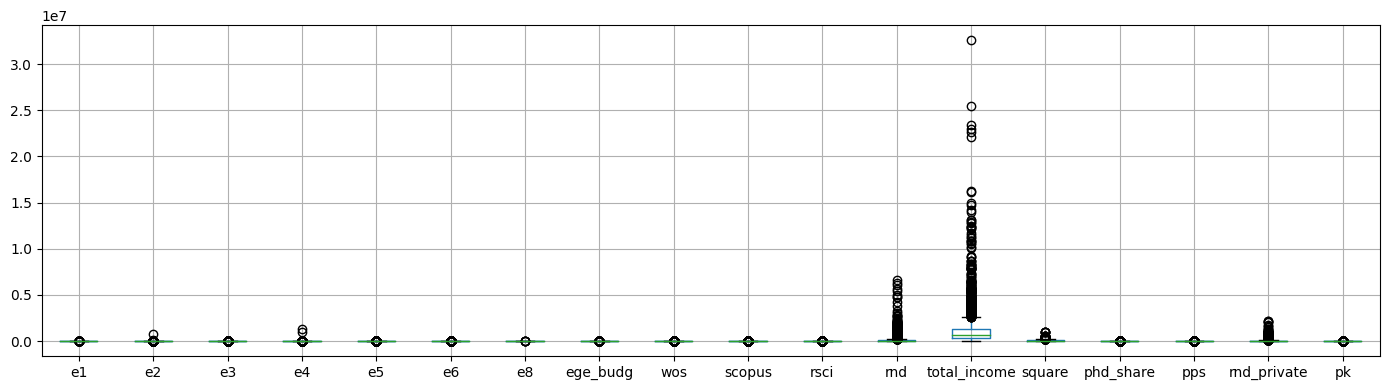

In [ ]:
new_df.boxplot(figsize=(14, 4))
plt.tight_layout()
plt.show()

## Выбросы прослеживаются у показателей: e2, e4, rnd, total_income, square, rnd_private

## e2

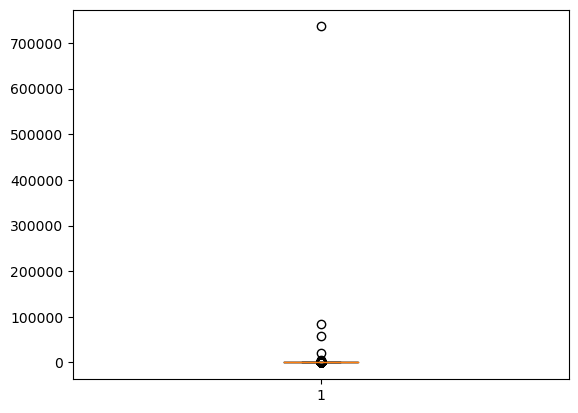

In [ ]:
plt.boxplot(df['e2'])
plt.show()

In [ ]:
df[df.e2 > 7000][['id', 'name', 'year', 'e2']]

,id,name,year,e2
2357,110173,Государственное бюджетное образовательное учре...,2013,85305.50
2358,110173,Государственное бюджетное образовательное учре...,2014,57538.45
2552,113232,Федеральное государственное унитарное предприя...,2016,20555.21
2553,113232,Федеральное государственное унитарное предприя...,2017,735892.54


In [ ]:
df[df.e2 > 7000]['name'].values

array(['Государственное бюджетное образовательное учреждение высшего образования «Высшая школа музыки Республики Саха (Якутия) (институт) имени В.А. Босикова»',
       'Государственное бюджетное образовательное учреждение высшего образования «Высшая школа музыки Республики Саха (Якутия) (институт) имени В.А. Босикова»',
       'Федеральное государственное унитарное предприятие «Всероссийский научно-исследовательский институт авиационных материалов»',
       'Федеральное государственное унитарное предприятие «Всероссийский научно-исследовательский институт авиационных материалов»'],
      dtype=object)

In [ ]:
df[df['id'] == 113232]

,federal_district,region_code,region_name,id,name,year,e1,e2,e3,e4,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
2552,Центральный федеральный округ,77,г. Москва,113232,Федеральное государственное унитарное предприя...,2016,0.0,20555.21,0.0,36094.54,...,3.2945,7.0697,53.8846,3293972.5,5784149.8,84732,90.91,11,91989.04,10.5
2553,Центральный федеральный округ,77,г. Москва,113232,Федеральное государственное унитарное предприя...,2017,0.0,735892.54,0.0,981925.00,...,165.8459,208.1541,1220.1541,4783301.5,6382512.5,84732,90.91,11,1623602.53,17.0


In [ ]:
735892.54/20555.21

35.800779461752036

In [ ]:
df[df['id'] == 110173]

,federal_district,region_code,region_name,id,name,year,e1,e2,e3,e4,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
2357,Дальневосточный федеральный округ,14,Республика Саха (Якутия),110173,Государственное бюджетное образовательное учре...,2013,56.47,85305.50,0.0,5248.91,...,0.0,0.0000,1.6875,1571373.0,167964.93,5510,10.89,27,0.00,63.0
2358,Дальневосточный федеральный округ,14,Республика Саха (Якутия),110173,Государственное бюджетное образовательное учре...,2014,63.08,57538.45,0.0,6157.73,...,0.0,0.0000,1.6686,548121.0,202502.70,5510,17.24,27,0.00,75.0
2359,Дальневосточный федеральный округ,14,Республика Саха (Якутия),110173,Государственное бюджетное образовательное учре...,2015,77.81,177.91,0.0,5925.69,...,0.0,0.0000,24.3505,5888.8,196140.50,5510,12.17,31,0.00,84.0
2360,Дальневосточный федеральный округ,14,Республика Саха (Якутия),110173,Государственное бюджетное образовательное учре...,2016,70.67,146.95,0.0,7206.59,...,0.0,0.8328,29.9472,4239.5,207910.20,5510,27.47,24,3526.80,89.0
2361,Дальневосточный федеральный округ,14,Республика Саха (Якутия),110173,Государственное бюджетное образовательное учре...,2017,79.84,113.01,2.2,6285.45,...,0.0,0.0000,23.2606,3848.0,214019.70,5029,22.07,22,2486.22,91.0


In [ ]:
57538.45/177.91

323.4132426507785

### Вывод по e2
Наблюдений для «Всероссийского научно-исследовательского института авиационных материалов» всего 2. Увелечение отношения общего
объема средств, поступивших за отчетный год от выполнения НИОКР к численности НПР в 2017 в 35 раз по сравнению с 2016 скорее всего может быть объяснено поступлением ключевого заказа. Выброс скорее всего случаен

В Государственном бюджетном образовательном учреждении высшего образования «Высшая школа музыки Республики Саха (Якутия) (институт) имени В.А. Босикова» в 2015 произошло падение показетеля e2 в 323 раза по сравнению с 2014. И далее наблюдается постепенное снижение данного признака.

### Замена выбросов на медиану

In [9]:
def replace_outliers_with_median_for_column(df, column_name, value):
    data = df[column_name]
    median = np.median(data)
    data_without_outliers = np.where((data > value), median, data)
    df[column_name] = data_without_outliers
    return df
replace_outliers_with_median_for_column(df, 'e2', 7000).describe()['e2']

count    2564.000000
mean      228.328947
std       344.387781
min         0.000000
25%        75.545000
50%       124.167500
75%       228.937500
max      4591.210000
Name: e2, dtype: float64

In [ ]:
df.describe()['e2']

count      2564.000000
mean        578.872925
std       14677.259616
min           0.000000
25%          75.545000
50%         124.235000
75%         229.735000
max      735892.540000
Name: e2, dtype: float64

## e4

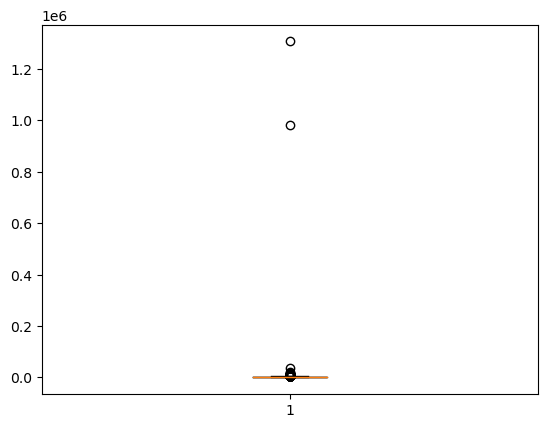

In [ ]:
plt.boxplot(df['e4'])
plt.show()

In [ ]:
df[df['e4'] > 20000]['name'].values

array(['Федеральное государственное бюджетное образовательное учреждение высшего профессионального образования «Российская школа частного права (институт)»',
       'Федеральное государственное унитарное предприятие «Всероссийский научно-исследовательский институт авиационных материалов»',
       'Федеральное государственное унитарное предприятие «Всероссийский научно-исследовательский институт авиационных материалов»'],
      dtype=object)

In [ ]:
df[df['id'] == 1985]

,federal_district,region_code,region_name,id,name,year,e1,e2,e3,e4,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
2274,Центральный федеральный округ,77,г. Москва,1985,Федеральное государственное бюджетное образова...,2013,0.0,0.0,0.0,1615.91,...,0.0,0.0,17.823,0.0,40801.8,781,90.10,30,0.0,60.0
2275,Центральный федеральный округ,77,г. Москва,1985,Федеральное государственное бюджетное образова...,2014,0.0,0.0,0.0,1305943.43,...,0.0,0.0,65.051,0.0,32584600.0,1242,87.88,35,0.0,63.0


In [ ]:
1305943.43/1615.91

808.1783205747844

In [ ]:
df[df['id'] == 113232]

,federal_district,region_code,region_name,id,name,year,e1,e2,e3,e4,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
2552,Центральный федеральный округ,77,г. Москва,113232,Федеральное государственное унитарное предприя...,2016,0.0,20555.21,0.0,36094.54,...,3.2945,7.0697,53.8846,3293972.5,5784149.8,84732,90.91,11,91989.04,10.5
2553,Центральный федеральный округ,77,г. Москва,113232,Федеральное государственное унитарное предприя...,2017,0.0,735892.54,0.0,981925.00,...,165.8459,208.1541,1220.1541,4783301.5,6382512.5,84732,90.91,11,1623602.53,17.0


In [ ]:
981925.00/36094.54

27.204253053231874

## Вывод по e4
В Федеральном государственном бюджетном образовательном учреждении высшего профессионального образования «Российская школа частного права (институт)» значение Отношение объема средств организации, поступивших за отчетный год из бюджетных и внебюджетных источников, без учета собственных средств, к численности НПР в 2014 году увеличилось в 808 раз по сравнению с 2013 годом. Выброс скорее всего случаен

В Федеральном государственном унитарном предприятии «Всероссийский научно-исследовательский институт авиационных материалов» значение показателя e4 в 2017 году увеличилось в 27 раз по сравнению  с 2016 годом. Это скорее всего может быть объяснено поступлением ключевого заказа. Выброс скорее всего случаен

In [10]:
replace_outliers_with_median_for_column(df, 'e4', 20000).describe()['e4']

count     2564.000000
mean      2424.363781
std       1487.830099
min          0.000000
25%       1612.442500
50%       2009.697500
75%       2746.067500
max      19777.220000
Name: e4, dtype: float64

In [ ]:
df.describe()['e4']

count    2.564000e+03
mean     3.328394e+03
std      3.223557e+04
min      0.000000e+00
25%      1.612442e+03
50%      2.009825e+03
75%      2.747302e+03
max      1.305943e+06
Name: e4, dtype: float64

## rnd

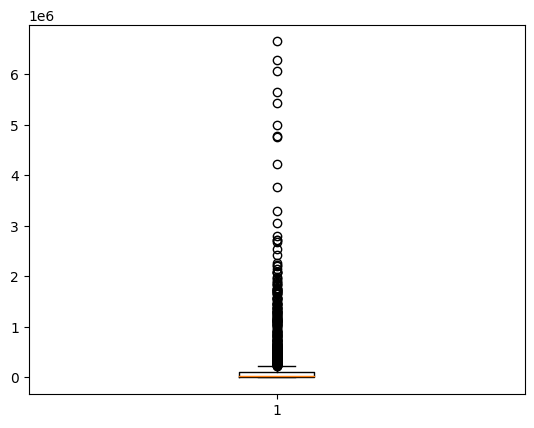

In [ ]:
plt.boxplot(df['rnd'])
plt.show()

In [ ]:
np.unique(df[df['rnd'] > 3000000]['name'].values)

array(['Федеральное государственное бюджетное образовательное учреждение высшего образования «Московский государственный технический университет имени Н.Э. Баумана (национальный исследовательский университет)»',
       'Федеральное государственное бюджетное образовательное учреждение высшего образования «Московский государственный университет имени М.В.Ломоносова»',
       'Федеральное государственное унитарное предприятие «Всероссийский научно-исследовательский институт авиационных материалов»'],
      dtype=object)

In [ ]:
# rnd - Общий объем научно-исследовательских и опытно-конструкторских работ
# выбросы в топовых вузах

In [ ]:
# id = 147 - МГТУ им Баумана

In [ ]:
df[df['id'] == 147][['year', 'rnd']]

,year,rnd
508,2013,5443108.4
509,2014,4765638.5
510,2015,3771453.4
511,2016,3050704.8
512,2017,4221262.2


from matplotlib import pyplot as plt
_df_63['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64['rnd'].plot(kind='hist', bins=20, title='rnd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='year', y='rnd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['rnd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_66.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('rnd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_67.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_68['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_69['rnd'].plot(kind='line', figsize=(8, 4), title='rnd')
plt.gca().spines[['top', 'right']].set_visible(False)

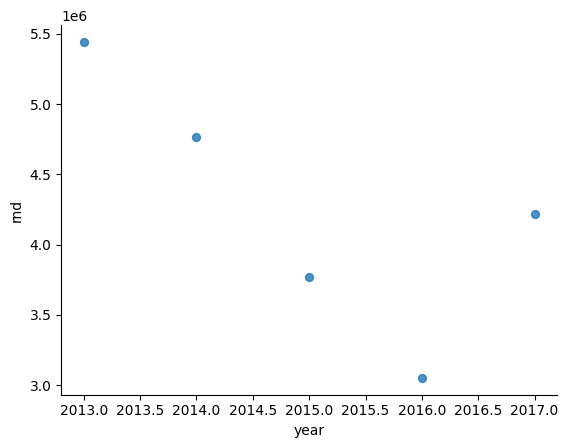

In [ ]:
from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='year', y='rnd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# id = 1725 - МГУ имю Ломоносова

In [ ]:
df[df['id'] == 1725][['year', 'rnd']]

,year,rnd
1917,2013,4999592.5
1918,2014,5657091.2
1919,2015,6287054.2
1920,2016,6651330.8
1921,2017,6069631.3


from matplotlib import pyplot as plt
_df_70['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71['rnd'].plot(kind='hist', bins=20, title='rnd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72.plot(kind='scatter', x='year', y='rnd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['rnd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_73.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('rnd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_74.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_75['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_76['rnd'].plot(kind='line', figsize=(8, 4), title='rnd')
plt.gca().spines[['top', 'right']].set_visible(False)

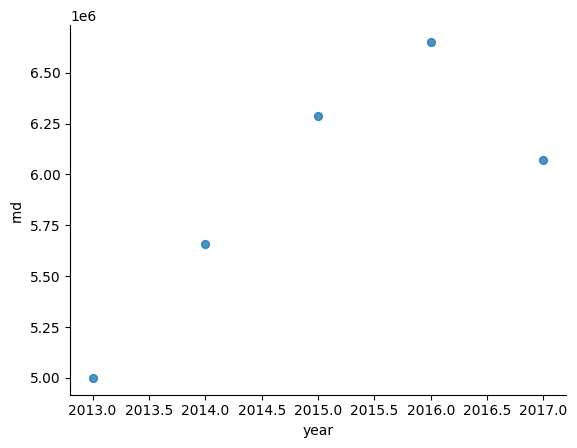

In [ ]:
from matplotlib import pyplot as plt
_df_72.plot(kind='scatter', x='year', y='rnd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# id = 113232 - Федеральное государственное унитарное предприятие «Всероссийский научно-исследовательский институт авиационных материалов»

In [ ]:
df[df['id'] == 113232][['year', 'rnd']]

,year,rnd
2552,2016,3293972.5
2553,2017,4783301.5


## Выводы по признаку rnd:

Аномальные значения прослеживаются исключительно в высокорейтинговых технических вузах. Динамика по годам доказывает неслучайность выбросов.

In [11]:
replace_outliers_with_median_for_column(df, 'rnd', 4000000).describe()['rnd']

count    2.564000e+03
mean     1.472260e+05
std      3.431699e+05
min      0.000000e+00
25%      1.609080e+04
50%      3.863985e+04
75%      1.011163e+05
max      3.771453e+06
Name: rnd, dtype: float64

In [ ]:
df.describe()['rnd']

count    2.564000e+03
mean     1.661534e+05
std      4.662865e+05
min      0.000000e+00
25%      1.609080e+04
50%      3.867870e+04
75%      1.041295e+05
max      6.651331e+06
Name: rnd, dtype: float64

In [ ]:
df.describe()['rnd']['std']

466286.53432426794

## Total income

{'whiskers': [<matplotlib.lines.Line2D at 0x79432cb8a410>,
 'caps': [<matplotlib.lines.Line2D at 0x79432cb8a290>,
 'boxes': [<matplotlib.lines.Line2D at 0x79432cb8bf40>],
 'medians': [<matplotlib.lines.Line2D at 0x79432cb8bc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x79432cb8a230>],
 'means': []}

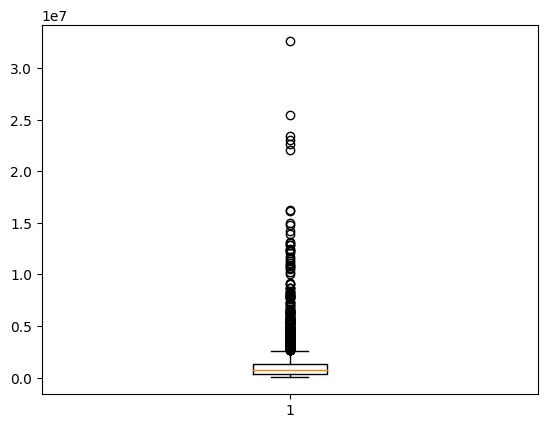

In [ ]:
plt.boxplot(df['total_income'])

In [ ]:
df[df['total_income'] > 15000000].iloc[:, [3,4,5,6,18]]

,id,name,year,e1,total_income
1917,1725,Федеральное государственное бюджетное образова...,2013,85.89,2.210036e+07
1918,1725,Федеральное государственное бюджетное образова...,2014,81.57,2.259769e+07
1919,1725,Федеральное государственное бюджетное образова...,2015,82.55,2.301488e+07
1920,1725,Федеральное государственное бюджетное образова...,2016,82.68,2.337754e+07
1921,1725,Федеральное государственное бюджетное образова...,2017,81.97,2.541882e+07
2088,1766,Федеральное государственное автономное образов...,2015,85.32,1.619034e+07
2090,1766,Федеральное государственное автономное образов...,2017,85.44,1.622277e+07
2275,1985,Федеральное государственное бюджетное образова...,2014,0.00,3.258460e+07


In [ ]:
# Для МГУ

In [ ]:
df[df['id'] == 1725][['year', 'total_income']]

,year,total_income
1917,2013,2.210036e+07
1918,2014,2.259769e+07
1919,2015,2.301488e+07
1920,2016,2.337754e+07
1921,2017,2.541882e+07


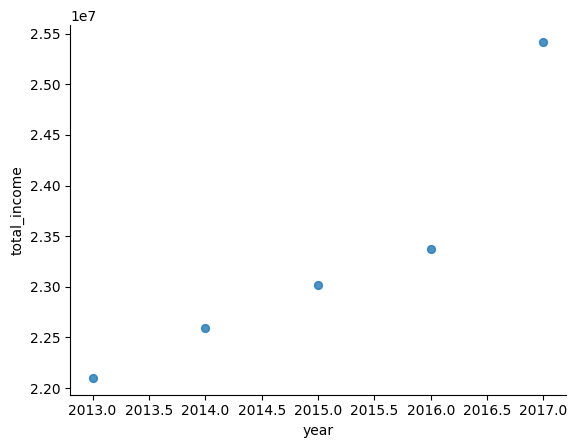

In [ ]:
from matplotlib import pyplot as plt
df_24.plot(kind='scatter', x='year', y='total_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Для ВШЭ

In [ ]:
df[df['id'] == 1766][['year', 'total_income']]

,year,total_income
2086,2013,14166135.76
2087,2014,14962023.10
2088,2015,16190343.60
2089,2016,13957791.40
2090,2017,16222774.80


from matplotlib import pyplot as plt
_df_77['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_78['total_income'].plot(kind='hist', bins=20, title='total_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_79.plot(kind='scatter', x='year', y='total_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['total_income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_80.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('total_income')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_81.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_82['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_83['total_income'].plot(kind='line', figsize=(8, 4), title='total_income')
plt.gca().spines[['top', 'right']].set_visible(False)

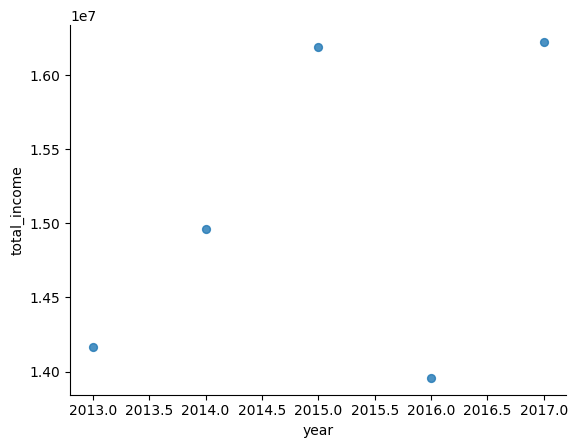

In [ ]:
from matplotlib import pyplot as plt
_df_79.plot(kind='scatter', x='year', y='total_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

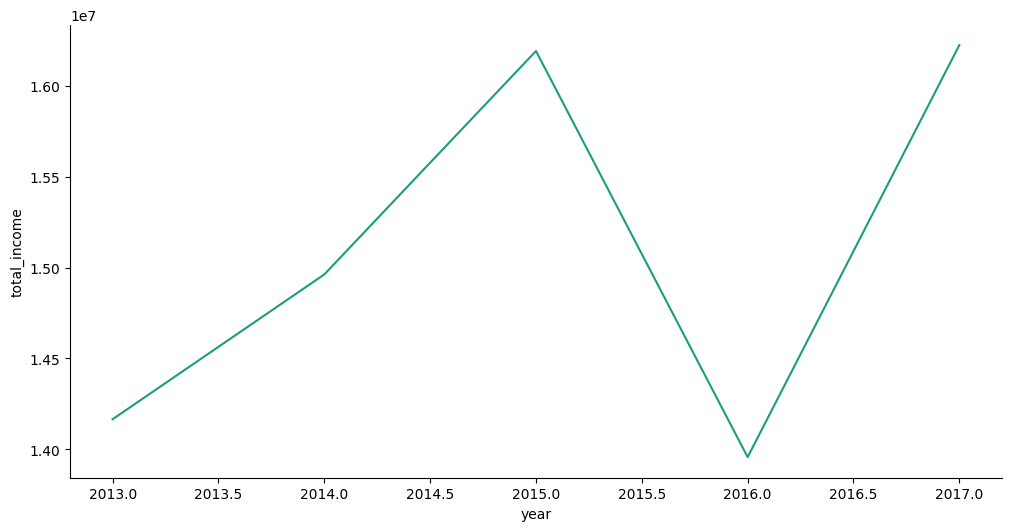

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['total_income']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('total_income')

In [ ]:
# Для Российской школы частного права

In [ ]:
df[df['id'] == 1985][['year', 'total_income']]

,year,total_income
2274,2013,40801.8
2275,2014,32584600.0


In [ ]:
32584600.0/40801.8

798.6069242043243

## Выводы по total_income
Для МГУ хорошо прослеживается тренд, однако в 2017 году значение показателя аномально и скорее всего носит случайный характер.

Для ВШЭ показатель цикличен; заметных аномалий не прослеживается.

В Российской школе частного права в 2014 году показатель вырос практически в 800 раз по сравнению с предыдущим годом. Выброс случаен

In [12]:
replace_outliers_with_median_for_column(df, 'total_income', 15000000).describe()['total_income']

count    2.564000e+03
mean     1.227662e+06
std      1.702346e+06
min      4.905648e+03
25%      3.751277e+05
50%      7.093066e+05
75%      1.258382e+06
max      1.496202e+07
Name: total_income, dtype: float64

In [ ]:
df.describe()['total_income']

count    2.564000e+03
mean     1.296238e+06
std      2.098639e+06
min      4.905648e+03
25%      3.751277e+05
50%      7.096716e+05
75%      1.274272e+06
max      3.258460e+07
Name: total_income, dtype: float64

## Square

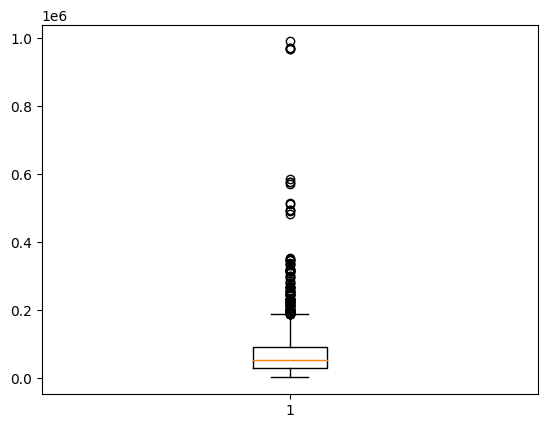

In [ ]:
plt.boxplot(df['square'])
plt.show()

In [ ]:
np.unique(df[df['square'] > 500000]['name'].values)

array(['Федеральное государственное автономное образовательное учреждение высшего образования «Дальневосточный федеральный университет»',
       'Федеральное государственное бюджетное образовательное учреждение высшего образования «Московский государственный университет имени М.В.Ломоносова»',
       'Федеральное государственное бюджетное образовательное учреждение высшего образования «Санкт-Петербургский государственный университет»'],
      dtype=object)

In [ ]:
df[df['square'] > 500000].iloc[:, [3,4,5,6,19]]

,id,name,year,e1,square
1231,1520,Федеральное государственное автономное образов...,2014,59.57,514297
1917,1725,Федеральное государственное бюджетное образова...,2013,85.89,965713
1918,1725,Федеральное государственное бюджетное образова...,2014,81.57,965713
1919,1725,Федеральное государственное бюджетное образова...,2015,82.55,968259
1920,1725,Федеральное государственное бюджетное образова...,2016,82.68,968259
1921,1725,Федеральное государственное бюджетное образова...,2017,81.97,988580
2102,1771,Федеральное государственное бюджетное образова...,2013,82.53,567996
2103,1771,Федеральное государственное бюджетное образова...,2014,84.03,583927
2104,1771,Федеральное государственное бюджетное образова...,2015,85.69,573856
2105,1771,Федеральное государственное бюджетное образова...,2016,86.01,573856


In [ ]:
# ДВФУ
df[df['id'] == 1520][['year', 'square']]

,year,square
1230,2013,489131
1231,2014,514297
1232,2015,494377
1233,2016,491941
1234,2017,482631


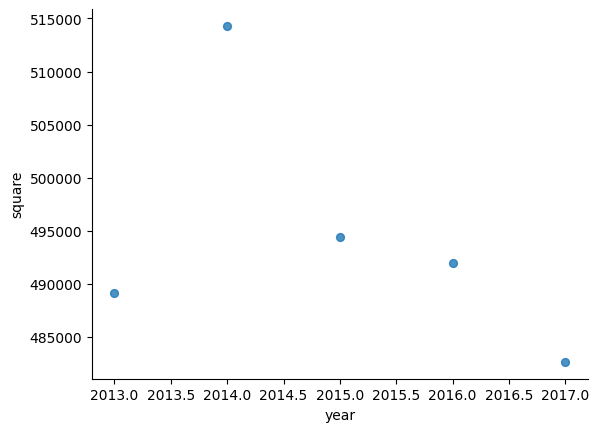

In [ ]:
from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='year', y='square', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# МГУ
df[df['id'] == 1725][['year', 'square']]

,year,square
1917,2013,965713
1918,2014,965713
1919,2015,968259
1920,2016,968259
1921,2017,988580


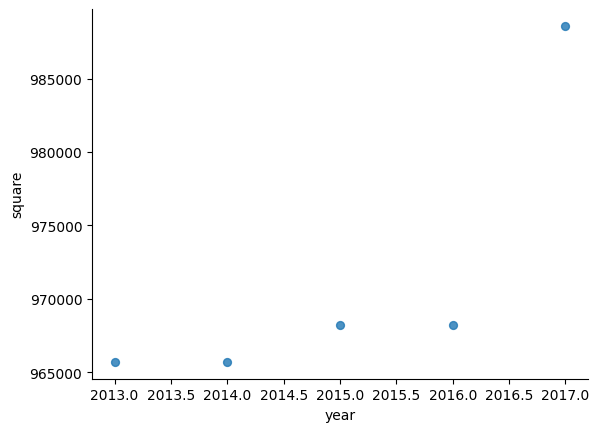

In [ ]:
from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='year', y='square', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# СПБГУ
df[df['id'] == 1771][['year', 'square']]

,year,square
2102,2013,567996
2103,2014,583927
2104,2015,573856
2105,2016,573856
2106,2017,509672


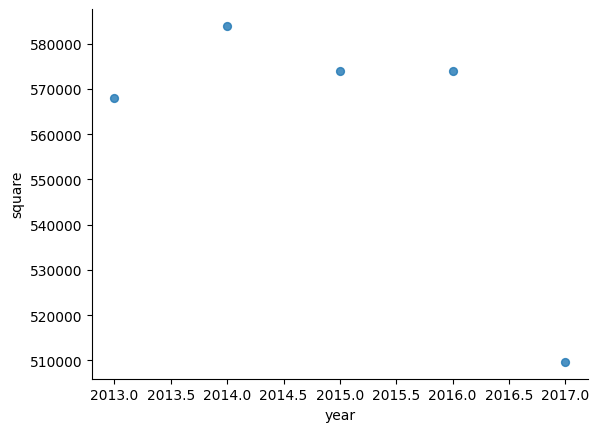

In [ ]:
from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='year', y='square', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Вывод по square
Во всех вузах выбросы являются случайными и скорее всего связаны с открытием/закрытием большого числа лабораторных помещений

In [13]:
replace_outliers_with_median_for_column(df, 'square', 500000).describe()['square']

count      2564.000000
mean      67230.093019
std       58609.916299
min         448.000000
25%       28179.500000
50%       52789.750000
75%       89577.750000
max      494377.000000
Name: square, dtype: float64

In [ ]:
df.describe()['square']

count      2564.000000
mean      70193.908736
std       74677.740766
min         448.000000
25%       28179.500000
50%       52809.500000
75%       91340.750000
max      988580.000000
Name: square, dtype: float64

## Rnd private

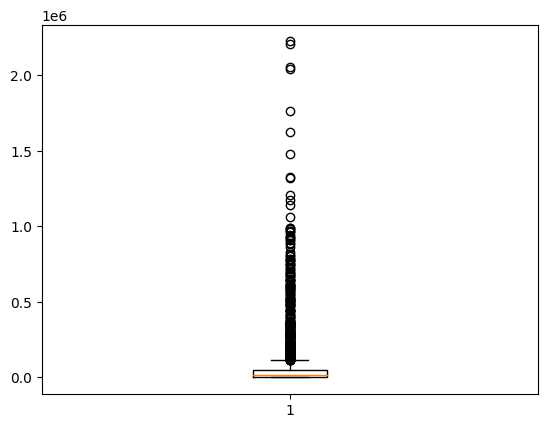

In [ ]:
plt.boxplot(df['rnd_private'])
plt.show()

In [ ]:
np.unique(df[df['rnd_private'] > 1500000]['name'].values)

array(['Федеральное государственное бюджетное образовательное учреждение высшего образования «Московский государственный технический университет имени Н.Э. Баумана (национальный исследовательский университет)»',
       'Федеральное государственное бюджетное образовательное учреждение высшего образования «Московский государственный университет имени М.В.Ломоносова»',
       'Федеральное государственное унитарное предприятие «Всероссийский научно-исследовательский институт авиационных материалов»'],
      dtype=object)

In [ ]:
df[df['rnd_private'] > 1500000].iloc[:, [3,4,5,6,22]]

,id,name,year,e1,rnd_private
511,147,Федеральное государственное бюджетное образова...,2016,77.33,2052560.52
512,147,Федеральное государственное бюджетное образова...,2017,77.78,2221577.68
1919,1725,Федеральное государственное бюджетное образова...,2015,82.55,2041056.54
1920,1725,Федеральное государственное бюджетное образова...,2016,82.68,2203145.18
1921,1725,Федеральное государственное бюджетное образова...,2017,81.97,1764577.54
2553,113232,Федеральное государственное унитарное предприя...,2017,0.00,1623602.53


In [ ]:
# Для МГТУ им Баумана
df[df['id'] == 147][['year', 'rnd_private']]

,year,rnd_private
508,2013,1140759.81
509,2014,1172446.48
510,2015,139126.86
511,2016,2052560.52
512,2017,2221577.68


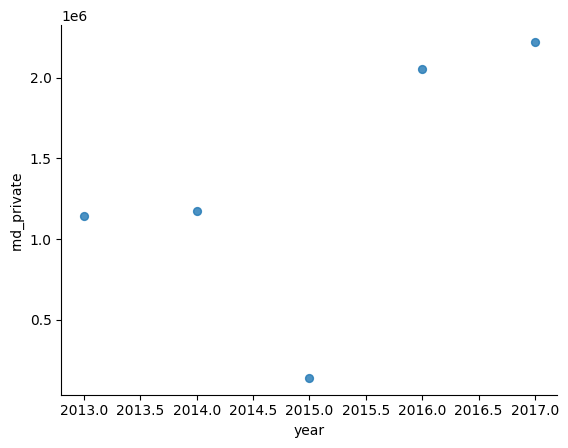

In [ ]:
from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='year', y='rnd_private', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Для МГУ
df[df['id'] == 1725][['year', 'rnd_private']]

,year,rnd_private
1917,2013,276450.48
1918,2014,394871.75
1919,2015,2041056.54
1920,2016,2203145.18
1921,2017,1764577.54


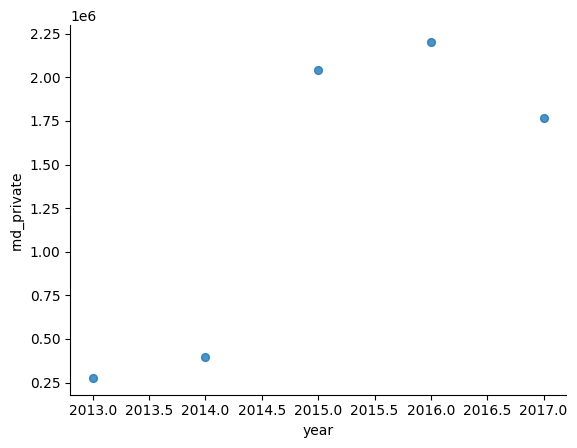

In [ ]:
from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='year', y='rnd_private', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Всероссийский научно-исследовательский институт авиационных материалов
df[df['id'] == 113232][['year', 'rnd_private']]

,year,rnd_private
2552,2016,91989.04
2553,2017,1623602.53


In [ ]:
1623602.53/1989.04

816.2744489804127

## Выводы по rnd_private

Для МГТУ и института авиационных материалов (в 2017 в 816 раз больше чем в 2016)выбросы случайны; для МГУ имеет место тренд

In [14]:
replace_outliers_with_median_for_column(df, 'rnd_private', 1500000).describe()['rnd_private']

count    2.564000e+03
mean     6.512162e+04
std      1.487524e+05
min      0.000000e+00
25%      3.000320e+03
50%      1.629617e+04
75%      4.753475e+04
max      1.479023e+06
Name: rnd_private, dtype: float64

In [ ]:
df.describe()['rnd_private']

count    2.564000e+03
mean     6.972714e+04
std      1.756058e+05
min      0.000000e+00
25%      3.000320e+03
50%      1.632826e+04
75%      4.821434e+04
max      2.221578e+06
Name: rnd_private, dtype: float64

In [15]:
df.describe()

,region_code,id,year,e1,e2,e3,e4,e5,e6,e8,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
count,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,...,2564.000000,2564.000000,2564.000000,2.564000e+03,2.564000e+03,2564.000000,2564.000000,2564.000000,2.564000e+03,2564.000000
mean,50.909516,12035.379095,2014.955148,63.551443,228.328947,5.641502,2424.363781,126.754275,75.031636,20.574863,...,65.125171,86.470968,835.436619,1.472260e+05,1.227662e+06,67230.093019,68.315967,447.676287,6.512162e+04,4479.111466
std,24.158042,33083.184356,1.420523,11.759901,344.387781,5.901523,1487.830099,63.298523,23.228551,26.964336,...,226.988421,270.999805,1240.126771,3.431699e+05,1.702346e+06,58609.916299,16.590214,469.704762,1.487524e+05,4241.805360
min,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,4.905648e+03,448.000000,0.000000,0.000000,0.000000e+00,7.300000
25%,29.750000,179.750000,2014.000000,58.407500,75.545000,1.730000,1612.442500,107.792500,70.000000,3.940000,...,1.578825,3.753225,151.468725,1.609080e+04,3.751277e+05,28179.500000,63.705000,169.750000,3.000320e+03,1521.462500
50%,55.000000,1566.000000,2015.000000,63.630000,124.167500,3.920000,2009.697500,145.370000,80.000000,5.080000,...,9.768900,17.920800,438.174100,3.863985e+04,7.093066e+05,52789.750000,72.460000,338.000000,1.629617e+04,3442.775000
75%,77.000000,1727.000000,2016.000000,69.712500,228.937500,7.570000,2746.067500,169.802500,90.000000,37.442500,...,35.864900,58.836900,966.460800,1.011163e+05,1.258382e+06,89577.750000,78.622500,550.000000,4.753475e+04,5830.850000
max,92.000000,120111.000000,2017.000000,100.000000,4591.210000,100.000000,19777.220000,390.650000,100.000000,100.000000,...,3592.294200,3993.951500,15278.085200,3.771453e+06,1.496202e+07,494377.000000,100.000000,5128.000000,1.479023e+06,33241.700000


In [17]:
df.to_csv('data_new.csv')

# Общий вывод по 4 пункту
После замены выбросов на медиану стандартное отклонение значительно уменьшилось. Это говорит о том, что выбросы серьезно влияли на данные

# Пункт 7
Кореляционный анализ показателей

<Axes: >

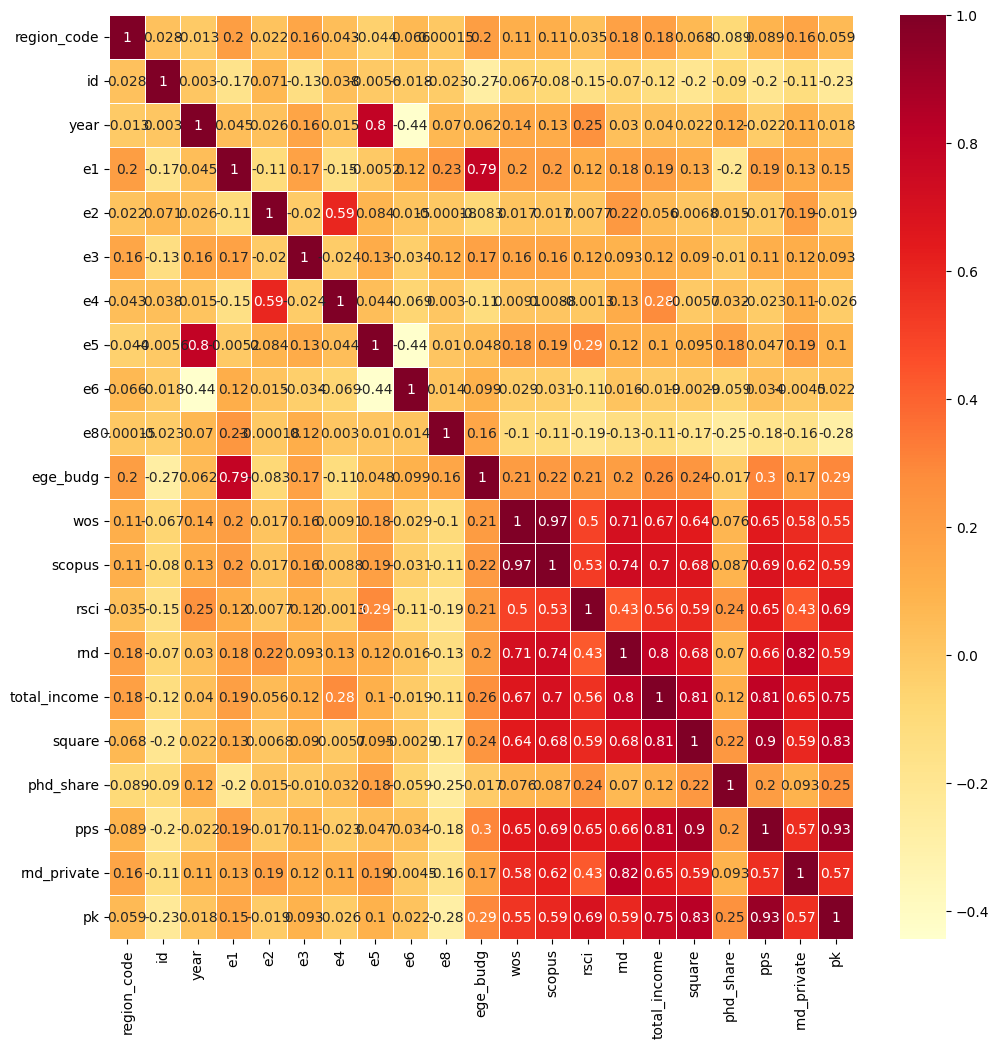

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.select_dtypes(exclude = 'object').corr() , annot=True, cmap='YlOrRd', linewidths=0.5)

Сильная зависимость прослеживается между признаками

scopus и wos

pps и pk (чем больше студентов, тем больше преподавателей)

pps, pk и square (чем больше студентов и преподавателей, тем больше площадь)

rnd и rnd_private (чем больше работ, тем больше доход)

e1 и ege_budg (схожие показатели; оба зависят от баллов ег студентов)

e5 и year (зарплата зависит от года (прибавки, индексирование и тд))

total_income и pk (чем больше студентов, тем больше дохода от платников получает вуз)

wos и rnd (чем больше работ,  тем больше научных статей)